In [1]:
#Long Short Temr Memory (LSTM) deep learning neural network model 

In [2]:
#Import Modules
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
df = pd.read_csv('BTC_Daily_Final.csv')
df.head()

,Unnamed: 0,Date,Close
0,999,2019-02-15,3602.47
1,998,2019-02-16,3618.41
2,997,2019-02-17,3667.58
3,996,2019-02-18,3898.60
4,995,2019-02-19,3907.79


In [4]:
df.tail()

,Unnamed: 0,Date,Close
995,4,2021-11-06,61470.61
996,3,2021-11-07,63273.59
997,2,2021-11-08,67525.83
998,1,2021-11-09,66947.66
999,0,2021-11-10,67155.31


In [5]:
df.shape

(1000, 3)

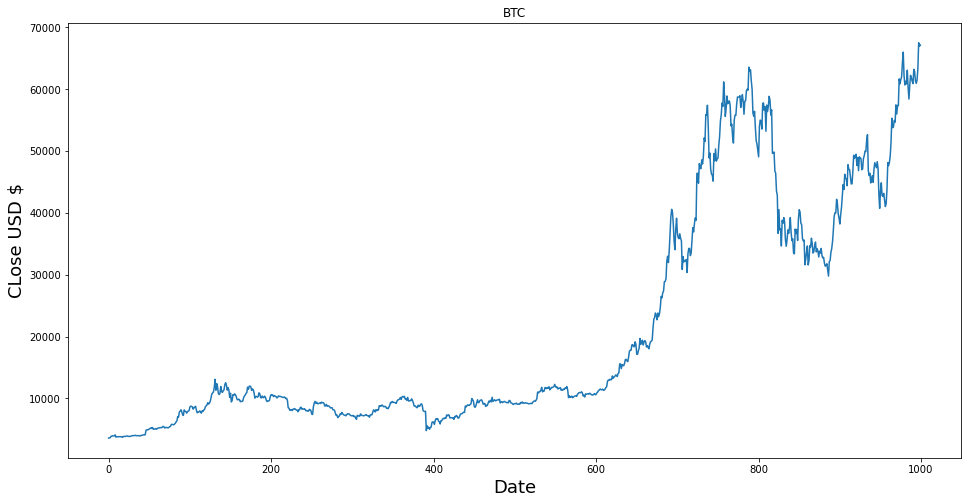

In [6]:
plt.figure(figsize=(16,8))
plt.title('BTC')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('CLose USD $', fontsize = 18)
plt.show()

In [7]:
# Create new frame with only the closing prices

data = df.filter(['Close'])

#Conver to numpy Array

dataset = data.values

#identify Rows

training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

800

In [8]:
#Scale the Data - Normalise input data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [2.49361110e-04],
       [1.01856348e-03],
       [4.63257876e-03],
       [4.77634467e-03],
       [5.74547396e-03],
       [5.23814768e-03],
       [5.62439146e-03],
       [8.06105937e-03],
       [2.20717434e-03],
       [3.52687969e-03],
       [3.23449831e-03],
       [3.37278891e-03],
       [3.30426936e-03],
       [3.44991252e-03],
       [3.40188626e-03],
       [3.21134559e-03],
       [1.76508244e-03],
       [3.99321938e-03],
       [4.05751512e-03],
       [4.24211118e-03],
       [4.10522851e-03],
       [5.32778627e-03],
       [4.91760759e-03],
       [4.21035440e-03],
       [4.38431271e-03],
       [4.12259306e-03],
       [4.29655137e-03],
       [5.02617509e-03],
       [6.31240285e-03],
       [5.92381252e-03],
       [6.02815622e-03],
       [6.46180051e-03],
       [6.89215961e-03],
       [5.91599065e-03],
       [6.01438973e-03],
       [6.31287216e-03],
       [6.09651933e-03],
       [5.21953164e-03],
       [5.41398324e-03],


In [9]:
#Create Training data set

#Create Scaled Training data set
train_data = scaled_data[0:training_data_len, :]
#Split Data x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00024936, 0.00101856, 0.00463258, 0.00477634,
       0.00574547, 0.00523815, 0.00562439, 0.00806106, 0.00220717,
       0.00352688, 0.0032345 , 0.00337279, 0.00330427, 0.00344991,
       0.00340189, 0.00321135, 0.00176508, 0.00399322, 0.00405752,
       0.00424211, 0.00410523, 0.00532779, 0.00491761, 0.00421035,
       0.00438431, 0.00412259, 0.00429655, 0.00502618, 0.0063124 ,
       0.00592381, 0.00602816, 0.0064618 , 0.00689216, 0.00591599,
       0.00601439, 0.00631287, 0.00609652, 0.00521953, 0.00541398,
       0.0068141 , 0.00665391, 0.00783407, 0.00789226, 0.00784502,
       0.00848031, 0.01963007, 0.0208082 , 0.02027725, 0.02194002,
       0.02254919, 0.02452625, 0.02556859, 0.02420915, 0.02668477,
       0.02213432, 0.02261364, 0.02257   , 0.02391661, 0.0222529 ])]
[0.024580216058730342]



In [10]:
#Convert x_train and y_train to numpy arrays to train LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape data - must do this for 3 dimensional shape for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(740, 60, 1)

In [12]:
#LSTM 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs= 1)

Epoch 1/1
740/740 [==============================] - 39s 52ms/step - loss: 0.0028


In [15]:
#Test Data set

#Create new array with scaled values

test_data = scaled_data[training_data_len - 60: , :]
#Create Data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
#Convert data to numpy array
x_test = np.array(x_test)

In [17]:
#Reshape Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Predictive output
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Evaluate Model - Root Mean Square Error (RMSE) --> Accuracy of Model STD of Residuals
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

#lower the value of RMSE indicates higher level of accuracy of model

5226.505769921875

In [20]:
#Plot Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


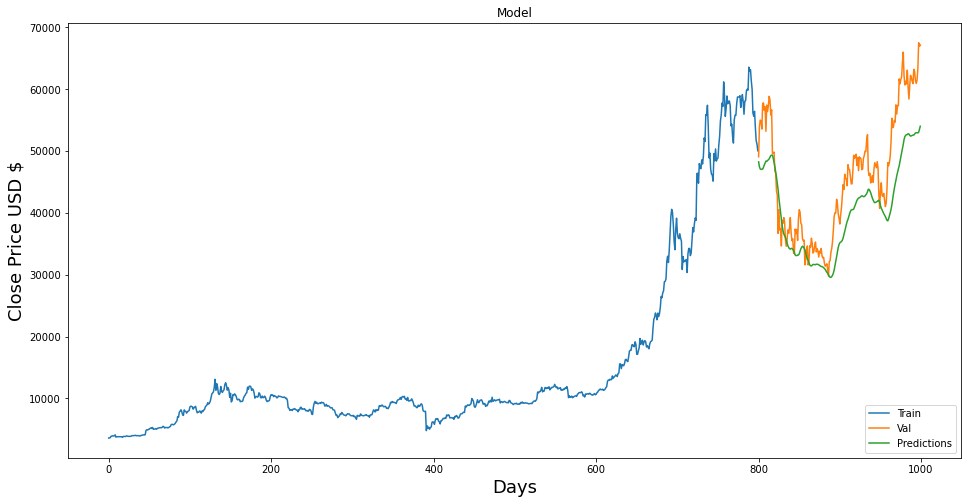

In [22]:
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Close Price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [23]:
valid['Predictions']

800    48263.496094
801    47465.515625
802    47100.750000
803    47024.089844
804    47073.867188
           ...     
995    52955.820312
996    52937.605469
997    53049.261719
998    53506.066406
999    54017.179688
Name: Predictions, Length: 200, dtype: float32